In [1]:
# https://www.kaggle.com/henriqueyamahata/bank-marketing

In [41]:
"""The purpose of this analysis is to predict whether or not a customer will make a new deposit into a current or new account after
a given campagin.""".replace("\n", "")

'The purpose of this analysis is to predict whether or not a customer will make a new deposit into a current or new account aftera given campagin.'

# Results
 - scroll down to see the full work flow

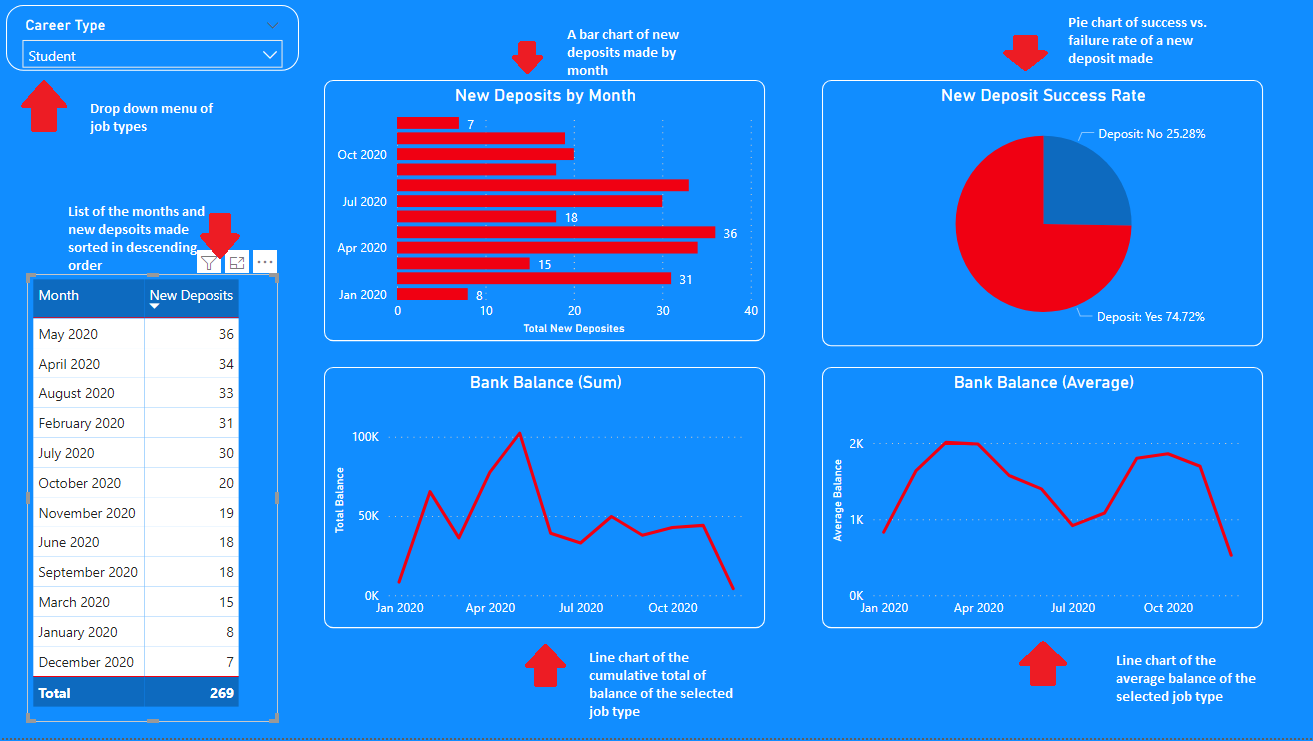

In [52]:
from IPython.display import Image
Image("bank_dashboard.PNG") # dashboard was created in Power BI

In [53]:
print("Precision:", pre)
print("Recall:", re)
print("Accuracy:", acc)

Precision: 0.83
Recall: 0.83
Accuracy: 0.83


In [61]:
"""A Precision score of 83%  tells me that when the model is making a prediction of 1 (makes depsoit) it is correct 83% of the time.
 A recall score of 83% tells me that this model is able to detect 83% of customers who are likely to make a deposit. Lastly, an accuracy of 
83% means that whenever this model is making a prediction, whether 0 (no deposit) or 1 (depsoit) it is correct 83% of the time.""".replace("\n","")

'A Precision score of 83%  tells me that when the model is making a prediction of 1 (makes depsoit) it is correct 83% of the time. A recall score of 83% tells me that this model is able to detect 83% of customers who are likely to make a deposit. Lastly, an accuracy of 83% means that whenever this model is making a prediction, whether 0 (no deposit) or 1 (depsoit) it is correct 83% of the time.'

In [54]:
predictions_df_signed = predictions_df[predictions_df['prediction'] == 1]
predictions_df_signed.head(5)

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,prediction,probability
4014,24,393,1298,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0.814100
2509,32,2465,414,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0.719957
1153,40,1308,1776,2,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0.740857
3471,41,0,395,3,426,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0.577663
7666,47,545,588,3,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0.614196


In [55]:
"""The above dataframe is a list of customers who were predicted to make a deposit after being exposed to a given campagin. These and their listed probabilites would make a 
good starting point of who to target during a campagin""".replace("\n", "")

'The above dataframe is a list of customers who were predicted to make a deposit after being exposed to a given campagin. These and their listed probabilites would make a good starting point of who to target during a campagin'

In [56]:
jobs = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown']
for i  in jobs:
    print(i)
    print(predictions_df[predictions_df[i] == 1]['probability'].describe())

job_admin.
count    409.000000
mean       0.445877
std        0.282771
min        0.033545
25%        0.178099
50%        0.426476
75%        0.689550
max        0.972447
Name: probability, dtype: float64
job_blue-collar
count    578.000000
mean       0.371443
std        0.278183
min        0.017721
25%        0.108723
50%        0.277635
75%        0.654251
max        0.969026
Name: probability, dtype: float64
job_entrepreneur
count    97.000000
mean      0.362414
std       0.254095
min       0.040001
25%       0.140053
50%       0.266512
75%       0.613107
max       0.959808
Name: probability, dtype: float64
job_housemaid
count    90.000000
mean      0.434550
std       0.267558
min       0.041092
25%       0.196118
50%       0.403521
75%       0.680140
max       0.927458
Name: probability, dtype: float64
job_management
count    783.000000
mean       0.512978
std        0.278159
min        0.031103
25%        0.242985
50%        0.560916
75%        0.750035
max        0.975692
Name: p

In [57]:
"""Based on these results, if I were to target a specific customer type using their listed job, I would target the following based on their success rate:
students (68%), retirees (65%), unemployed (56%), and those who did not list their job (54%), and managment type jobs (51%)""".replace("\n","")

'Based on these results, if I were to target a specific customer type using their listed job, I would target the following based on their success rate:students (68%), retirees (65%), unemployed (56%), and those who did not list their job (54%), and managment type jobs (51%)'

# Load Libraries

In [2]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Data Viz
from tqdm import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV

# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score, recall_score, f1_score, confusion_matrix# Functions Used

# source: https://www.kaggle.com/d4rklucif3r/water-quality-eda-luciferml-73-accuracy
def boxPlotter(DataFrame, ColumnName):
    # Plots boxplots for column given as parameter.    
    sns.catplot(x="Potability", y=ColumnName, data=DataFrame, kind="box")

# source: https://www.kaggle.com/d4rklucif3r/water-quality-eda-luciferml-73-accuracy
def distributionPlot(DataFrame):
     # Creates distribution plot.
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm_notebook(range(0, len(DataFrame.columns[:-1])), desc = 'Your plots are being ready'):
        fig.add_subplot(np.ceil(len(DataFrame.columns)/3), 3, i+1)
        sns.distplot(
            DataFrame.iloc[:, i], color="lightcoral", rug=True)
        fig.tight_layout(pad=3.0)

# Load Data

In [5]:
bank_data = pd.read_csv(r'C:\Users\ranih\OneDrive\Desktop\Python For Real\Github\Data\Kaggle\Bank\bank_term_deposit.csv')
bank_data_2 = bank_data.copy()

In [6]:
print("rows:", bank_data.shape[0])
print("columns:", bank_data.shape[1])

rows: 11162
columns: 17


In [7]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
bank_data['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [9]:
bank_data.loc[bank_data['deposit'] == 'yes', 'deposit_bool'] = 1
bank_data.loc[bank_data['deposit'] == 'no', 'deposit_bool'] = 0

In [10]:
bank_data.loc[bank_data['deposit'] == 'yes', 'deposit_yes'] = 1
bank_data.loc[bank_data['deposit'] == 'no', 'deposit_yes'] = 0

bank_data.loc[bank_data['deposit'] == 'no', 'deposit_no'] = 1
bank_data.loc[bank_data['deposit'] == 'yes', 'deposit_no'] = 0

bank_data.loc[bank_data['loan'] == 'yes', 'loan_yes'] = 1
bank_data.loc[bank_data['loan'] == 'no', 'loan_yes'] = 0

bank_data.loc[bank_data['loan'] == 'no', 'loan_no'] = 1
bank_data.loc[bank_data['loan'] == 'yes', 'loan_no'] = 0

bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,deposit,deposit_bool,deposit_yes,deposit_no,loan_yes,loan_no
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,1,-1,0,unknown,yes,1.0,1.0,0.0,0.0,1.0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,1,-1,0,unknown,yes,1.0,1.0,0.0,0.0,1.0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,1,-1,0,unknown,yes,1.0,1.0,0.0,0.0,1.0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,1,-1,0,unknown,yes,1.0,1.0,0.0,0.0,1.0
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,2,-1,0,unknown,yes,1.0,1.0,0.0,0.0,1.0


In [11]:
bank_data.loc[bank_data['job'] == 'management', 'Job'] = 'Management'
bank_data.loc[bank_data['job'] == 'blue-collar', 'Job'] = 'Blue-Collar'
bank_data.loc[bank_data['job'] == 'technician', 'Job'] = 'Technician'
bank_data.loc[bank_data['job'] == 'admin.', 'Job'] = 'Admin'
bank_data.loc[bank_data['job'] == 'services', 'Job'] = 'Services'
bank_data.loc[bank_data['job'] == 'retired', 'Job'] = 'Retired'


bank_data.loc[bank_data['job'] == 'self-employed', 'Job'] = 'Self-Employed'
bank_data.loc[bank_data['job'] == 'student', 'Job'] = 'Student'
bank_data.loc[bank_data['job'] == 'unemployed', 'Job'] = 'Unemployed'
bank_data.loc[bank_data['job'] == 'entrepreneur', 'Job'] = 'Entrepreneur'
bank_data.loc[bank_data['job'] == 'housemaid', 'Job'] = 'Housemaid'
bank_data.loc[bank_data['job'] == 'unknown', 'Job'] = 'Unknown'

bank_data.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,deposit,deposit_bool,deposit_yes,deposit_no,loan_yes,loan_no,Job
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,-1,0,unknown,yes,1.0,1.0,0.0,0.0,1.0,Admin
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,-1,0,unknown,yes,1.0,1.0,0.0,0.0,1.0,Admin
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,-1,0,unknown,yes,1.0,1.0,0.0,0.0,1.0,Technician
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,-1,0,unknown,yes,1.0,1.0,0.0,0.0,1.0,Services
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,-1,0,unknown,yes,1.0,1.0,0.0,0.0,1.0,Admin
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,...,-1,0,unknown,yes,1.0,1.0,0.0,1.0,0.0,Management
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,...,-1,0,unknown,yes,1.0,1.0,0.0,1.0,0.0,Management
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,...,-1,0,unknown,yes,1.0,1.0,0.0,0.0,1.0,Retired
8,37,technician,married,secondary,no,1,yes,no,unknown,6,...,-1,0,unknown,yes,1.0,1.0,0.0,0.0,1.0,Technician
9,28,services,single,secondary,no,5090,yes,no,unknown,6,...,-1,0,unknown,yes,1.0,1.0,0.0,0.0,1.0,Services


In [12]:
# Outputed to be fed into Power BI for further visualizaton 
compression_opts = dict(method='zip',archive_name='bank_data.csv')  
bank_data.to_csv('bank_data.zip', index=False, compression = compression_opts)

# Data Exploration

In [13]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           11162 non-null  int64  
 1   job           11162 non-null  object 
 2   marital       11162 non-null  object 
 3   education     11162 non-null  object 
 4   default       11162 non-null  object 
 5   balance       11162 non-null  int64  
 6   housing       11162 non-null  object 
 7   loan          11162 non-null  object 
 8   contact       11162 non-null  object 
 9   day           11162 non-null  int64  
 10  month         11162 non-null  object 
 11  duration      11162 non-null  int64  
 12  campaign      11162 non-null  int64  
 13  pdays         11162 non-null  int64  
 14  previous      11162 non-null  int64  
 15  poutcome      11162 non-null  object 
 16  deposit       11162 non-null  object 
 17  deposit_bool  11162 non-null  float64
 18  deposit_yes   11162 non-nu

In [14]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous,deposit_bool,deposit_yes,deposit_no,loan_yes,loan_no
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840,0.473840,0.526160,0.130801,0.869199
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338,0.499338,0.499338,0.337198,0.337198
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
deposit =round(bank_data['deposit'].value_counts()[1]/(bank_data['deposit'].value_counts()[0] + bank_data['deposit'].value_counts()[1])
,2)
no_deposit =round(bank_data['deposit'].value_counts()[0]/(bank_data['deposit'].value_counts()[0] + bank_data['deposit'].value_counts()[1])
,2)
print("Percentage of new deposit made:", deposit)
print("Percentage of no deposit made:", no_deposit)

Percentage of new deposit made: 0.47
Percentage of no deposit made: 0.53


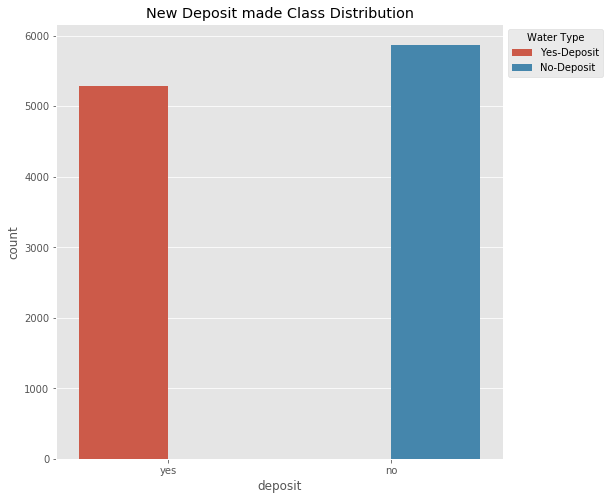

In [16]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x='deposit', hue='deposit' ,data=bank_data)




plt.title("New Deposit made Class Distribution")
legend_labels = ['Yes-Deposit', 'No-Deposit']
ax.legend(legend_labels,bbox_to_anchor=(1,1), title='Water Type')
plt.show()

In [48]:
"""Overall, the campagins lead to more people declining to make a new deposit. Moving forward, there should be a more targeted approach 
with future campagins that is focused on customers that are the most likely to make a deposit.""".replace("\n", "")

'Overall, the campagins lead to more people declining to make a new deposit. Moving forward, there should be a more targeted approach with future campagins that is focused on customers that are the most likely to make a deposit.'

# Model
 - Random Forrest

In [18]:
bank_data_2.drop(['day','month'], axis = 1, inplace = True) # dropping data that is not associated with a campagin or indiviual customer

In [19]:
bank_data_2 = pd.get_dummies(bank_data_2)

In [20]:
bank_data_2['deposit'] = bank_data['deposit']

bank_data_2.loc[bank_data_2['deposit'] == 'yes', 'deposit'] = 1
bank_data_2.loc[bank_data_2['deposit'] == 'no', 'deposit'] = 0
bank_data_2.head()

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes,deposit
0,59,2343,1042,1,-1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,1
1,56,45,1467,1,-1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,1
2,41,1270,1389,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
3,55,2476,579,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
4,54,184,673,2,-1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,1


In [21]:
# shuffle the data
bank_data_2 = bank_data_2.sample(frac=1)
bank_data_2.head()

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes,deposit
4393,60,367,318,2,-1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1
6811,41,732,25,1,-1,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
3509,34,2838,620,3,-1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1
2220,29,23,163,1,55,2,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
5538,29,344,279,2,-1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [42]:
bank_data_2['deposit'] = bank_data_2['deposit'].astype('bool').astype('int64')

In [43]:
X = bank_data_2.drop(['deposit_no', 'deposit_yes', 'deposit'], axis = 1)
y = bank_data_2.deposit

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

In [45]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)
y_pred = rf.predict(X_test)

In [26]:
pre = round(precision_score(y_test, y_pred, average='macro'),2)
re = round(recall_score(y_test, y_pred, average='macro'),2)
acc = round(accuracy_score(y_test, y_pred),2)

(0.82, 0.82, 0.82)

In [47]:
print("Precision:", pre)
print("Recall:", re)
print("Accuracy:", acc)

Precision: 0.83
Recall: 0.83
Accuracy: 0.83


In [27]:
"""I will tune this model to see if any improvments can be made."""

'I will tune this model to see if any improvments can be made.'

In [28]:
model_parameters = {

    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'criterion': ['entropy','gini'],
            'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    }
}

In [29]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = list()

for model_name, parameters in model_parameters.items():
    random_search = RandomizedSearchCV(parameters['model'], parameters['params'], cv = cv, n_iter=20) 
    random_search.fit(X,y)
    scores.append([model_name, dict(random_search.best_params_), random_search.best_score_])

In [30]:
data = pd.DataFrame(scores, columns = ['Model', 'Parameters', 'Score'])
data

,Model,Parameters,Score
0,Random Forest,"{'n_estimators': 200, 'max_features': 'auto', ...",0.824002


In [31]:
data['Parameters'][0] # these will be the paramters used to create the random forrest 

{'n_estimators': 200,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini'}

In [32]:
rf = RandomForestClassifier(n_estimators= 200, max_features='sqrt', max_depth=10, criterion='gini')
rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)
y_pred = rf.predict(X_test)

In [33]:
pre = round(precision_score(y_test, y_pred, average='macro'),2)
re = round(recall_score(y_test, y_pred, average='macro'),2)
acc = round(accuracy_score(y_test, y_pred),2)

(0.83, 0.83, 0.83)

In [ ]:
print("Precision:", pre)
print("Recall:", re)
print("Accuracy:", acc)

In [34]:
predictions_df = X_test.copy()
predictions_df['prediction'] = y_pred
predictions_df['probability'] = y_proba[:,1]
predictions_df.head()

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,prediction,probability
5421,52,-803,131,3,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0.150425
4014,24,393,1298,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0.814100
7800,40,4,171,2,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0.183531
10352,52,1453,254,21,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.447862
2509,32,2465,414,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0.719957


In [46]:
predictions_df_signed = predictions_df[predictions_df['prediction'] == 1]
predictions_df_signed.head(5)

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,prediction,probability
4014,24,393,1298,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0.814100
2509,32,2465,414,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0.719957
1153,40,1308,1776,2,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0.740857
3471,41,0,395,3,426,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0.577663
7666,47,545,588,3,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0.614196


In [51]:
"""The above dataframe is a list of customers who were predicted to make a deposit after being exposed to a given campagin. These and their listed probabilites would make a 
good starting point of who to target during a campagin""".replace("\n", "")

'The above dataframe is a list of customers who were predicted to make a deposit after being exposed to a given campagin. These and their listed probabilites would make a good starting point of who to target during a campagin'

In [37]:
jobs = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown']
for i  in jobs:
    print(i)
    print(predictions_df[predictions_df[i] == 1]['probability'].describe())

job_admin.
count    409.000000
mean       0.445877
std        0.282771
min        0.033545
25%        0.178099
50%        0.426476
75%        0.689550
max        0.972447
Name: probability, dtype: float64
job_blue-collar
count    578.000000
mean       0.371443
std        0.278183
min        0.017721
25%        0.108723
50%        0.277635
75%        0.654251
max        0.969026
Name: probability, dtype: float64
job_entrepreneur
count    97.000000
mean      0.362414
std       0.254095
min       0.040001
25%       0.140053
50%       0.266512
75%       0.613107
max       0.959808
Name: probability, dtype: float64
job_housemaid
count    90.000000
mean      0.434550
std       0.267558
min       0.041092
25%       0.196118
50%       0.403521
75%       0.680140
max       0.927458
Name: probability, dtype: float64
job_management
count    783.000000
mean       0.512978
std        0.278159
min        0.031103
25%        0.242985
50%        0.560916
75%        0.750035
max        0.975692
Name: p

In [50]:
"""Based on these results, if I were to target a specific customer type using their listed job, I would target the following based on their success rate:
students (68%), retirees (65%), unemployed (56%), and those who did not list their job (54%), and managment type jobs (51%)""".replace("\n","")

'Based on these results, if I were to target a specific customer type using their listed job, I would target the following based on their success rate:students (68%), retirees (65%), unemployed (56%), and those who did not list their job (54%), and managment type jobs (51%)'